In [262]:
import pandas as pd
import numpy as np
from  sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import xgboost as xgb
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
pd.options.display.max_seq_items = 500
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.charts import Scatter, output_file, show
from bokeh.sampledata.autompg import autompg as df
from bokeh.io import output_notebook
output_notebook()
import missingno
from jupyterthemes import jtplot
jtplot.style()
import seaborn as sns

Loading BokehJS ...

In [251]:
# Read data
train = pd.read_csv('./input/train.csv', parse_dates=['timestamp'])
test = pd.read_csv('./input/test.csv', parse_dates=['timestamp'])
macro = pd.read_csv('./input/macro.csv', parse_dates=['timestamp'])

# Exploration & Visualization & Preprocessing

In [249]:
train.ix[23584,'floor']

77.0

In [5]:
# data size
train.shape
test.shape
macro.shape

(30471, 292)

(7662, 291)

(2484, 100)

In [253]:
train.head()
train.tail()
test.head()
macro.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,NaN,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,175.15,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,178.66,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.9,99.8,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,43.4054,80.12,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,63932.0,732.760604,0.716,0.284,0.962915,12865.0,233.351529,8.0,3.9,553874.9,95.8,-0.3,14.1,13.8,10.7,11.0,216.0,18.715883,99.

In [7]:
train.describe()
test.describe()
# target distribution
# null values
train.isnull().mean()
test.isnull().mean()
"""
The data have so many strange values, we need some work to replace it with NA
"""

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

id                                       0.000000
timestamp                                0.000000
full_sq                                  0.000000
life_sq                                  0.209478
floor                                    0.005481
max_floor                                0.314135
material                                 0.314135
build_year                               0.446490
num_room                                 0.314135
kitch_sq                                 0.314135
state                                    0.444980
product_type                             0.000000
sub_area                                 0.000000
area_m                                   0.000000
raion_popul                              0.000000
green_zone_part                          0.000000
indust_part                              0.000000
children_preschool                       0.000000
preschool_quota                          0.219487
preschool_education_centers_raion        0.000000


id                                       0.000000
timestamp                                0.000000
full_sq                                  0.000000
life_sq                                  0.153485
floor                                    0.000000
max_floor                                0.000000
material                                 0.000000
build_year                               0.136909
num_room                                 0.000000
kitch_sq                                 0.000000
state                                    0.090577
product_type                             0.004307
sub_area                                 0.000000
area_m                                   0.000000
raion_popul                              0.000000
green_zone_part                          0.000000
indust_part                              0.000000
children_preschool                       0.000000
preschool_quota                          0.208301
preschool_education_centers_raion        0.000000


'\nThe data have so many strange values, we need some work to replace it with NA\n'

/home/yang/miniconda3/envs/tensorflow_py3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


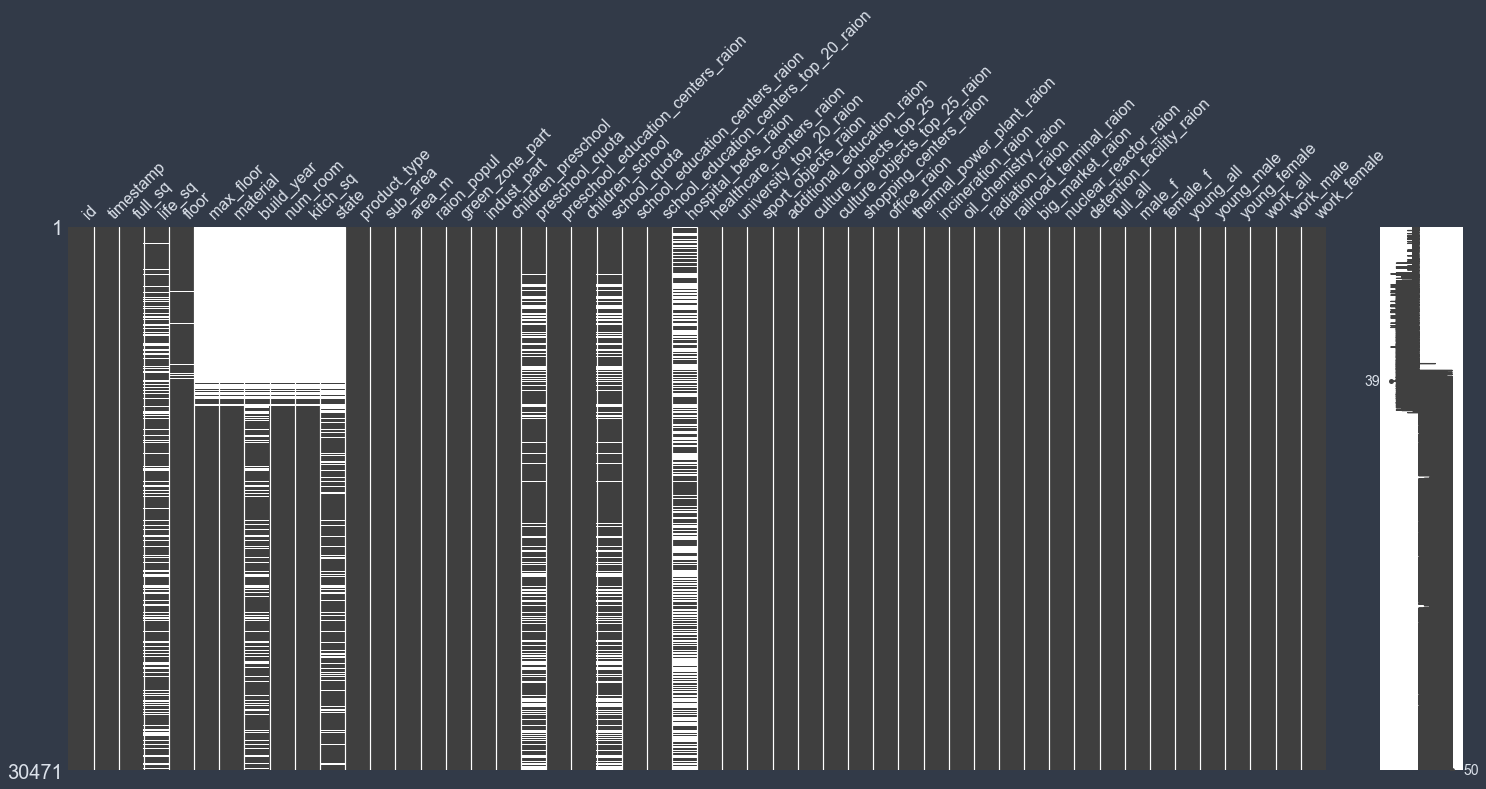

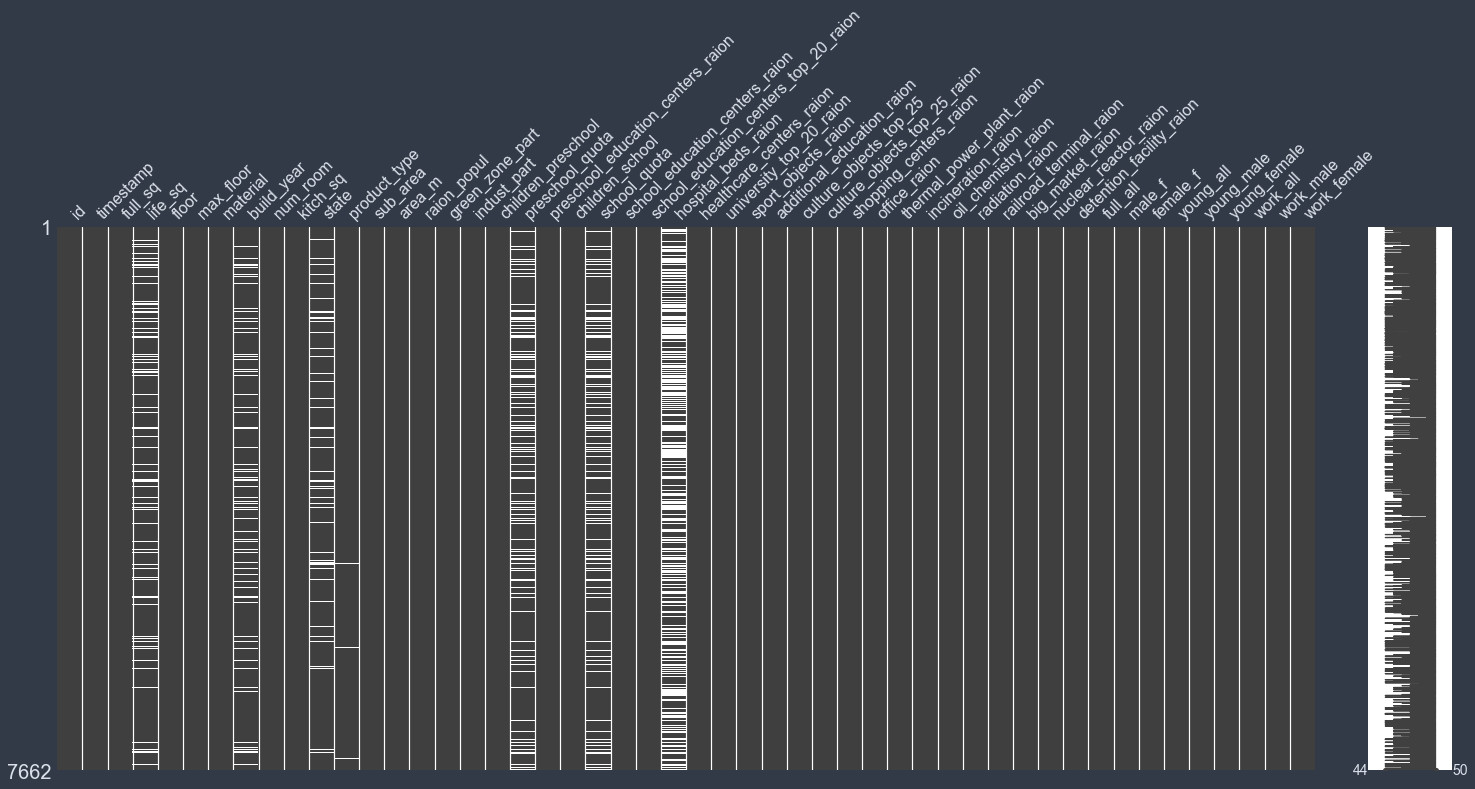

In [258]:
missingno.matrix(train.iloc[:,:50])
missingno.matrix(test.iloc[:,:50])

the null value distribution is quite different, we should clean it in the next steps

/home/yang/miniconda3/envs/tensorflow_py3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


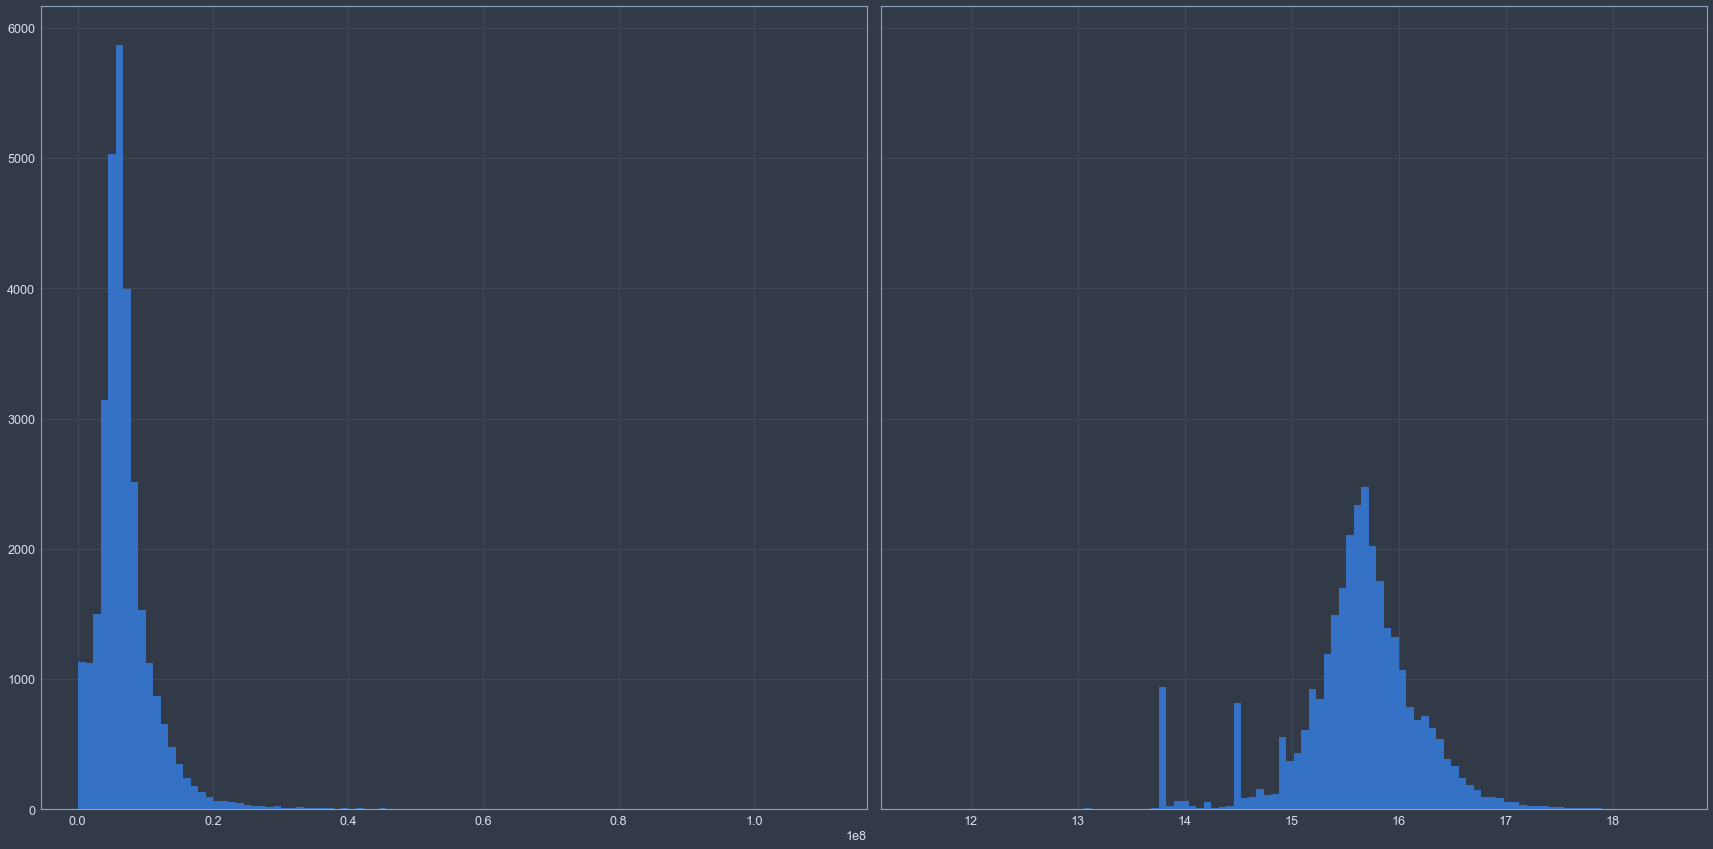

In [259]:
# y distribution
f,(fg1,fg2) = plt.subplots(1,2,sharey=True,figsize=(24,12))
fg2.hist(np.log(train.price_doc),bins=100);
fg1.hist(train.price_doc,bins=100);
# strange outlier in the lower tail, we clean it in lv1_preprocessing

/home/yang/miniconda3/envs/tensorflow_py3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


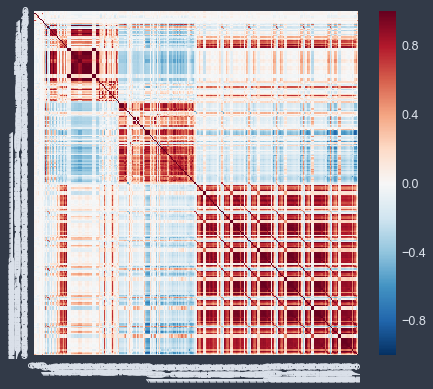

In [264]:
sns.heatmap(train.corr().values)

### house features

In [31]:
feat_house = ['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'state',
       'product_type', 'sub_area']

In [226]:
# drop extreme price_doc
train = train[train.price_doc != 111111112]
# full_sq
train.ix[train[(train.full_sq > 260)&(train.price_doc < 3e7)].index,'full_sq'] = np.NaN
train.ix[train[train.full_sq < 10].index,'full_sq'] = np.NaN
# life_sq
train.ix[train[(train.life_sq >600)|(train.life_sq<10)].index,'life_sq'] = np.NaN
# num room
train.ix[train[(train.num_room ==0)|(train.num_room >=10)].index,'num_room'] = np.NaN
# ktch_sq
train.ix[train[(train.kitch_sq ==0) | (train.kitch_sq > train.life_sq)].index,'kitch_sq'] = np.NaN
# ...more on lv1_preprocessing.py 

In [142]:
# visualize every feature, and find outliers.
p = Scatter(train, x='kitch_sq', y='price_doc')
show(p)

### other neighbourhood features

In [234]:
pd.Series([3,2,np.NaN,4]).interpolate()

0    3.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [ ]:
"""
 'area_m', 'raion_popul', 'green_zone_part',
       'indust_part', 'children_preschool', 'preschool_quota',
       'preschool_education_centers_raion', 'children_school', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25', 'culture_objects_top_25_raion',
       'shopping_centers_raion', 'office_raion', 'thermal_power_plant_raion',
       'incineration_raion', 'oil_chemistry_raion', 'radiation_raion',
       'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion',
       'detention_facility_raion', 'full_all', 'male_f', 'female_f',
       'young_all', 'young_male', 'young_female', 'work_all', 'work_male',
       'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all',
       '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female',
       '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male',
       '16_29_female', '0_13_all', '0_13_male', '0_13_female',
       'raion_build_count_with_material_info', 'build_count_block',
       'build_count_wood', 'build_count_frame', 'build_count_brick',
       'build_count_monolith', 'build_count_panel', 'build_count_foam',
       'build_count_slag', 'build_count_mix',
       'raion_build_count_with_builddate_info', 'build_count_before_1920',
       'build_count_1921-1945', 'build_count_1946-1970',
       'build_count_1971-1995', 'build_count_after_1995', 'ID_metro',
       'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk',
       'kindergarten_km', 'school_km', 'park_km', 'green_zone_km',
       'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km',
       'railroad_station_walk_km', 'railroad_station_walk_min',
       'ID_railroad_station_walk', 'railroad_station_avto_km',
       'railroad_station_avto_min', 'ID_railroad_station_avto',
       'public_transport_station_km', 'public_transport_station_min_walk',
       'water_km', 'water_1line', 'mkad_km', 'ttk_km', 'sadovoe_km',
       'bulvar_ring_km', 'kremlin_km', 'big_road1_km', 'ID_big_road1',
       'big_road1_1line', 'big_road2_km', 'ID_big_road2', 'railroad_km',
       'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal',
       'bus_terminal_avto_km', 'ID_bus_terminal', 'oil_chemistry_km',
       'nuclear_reactor_km', 'radiation_km', 'power_transmission_line_km',
       'thermal_power_plant_km', 'ts_km', 'big_market_km', 'market_shop_km',
       'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
       'basketball_km', 'hospice_morgue_km', 'detention_facility_km',
       'public_healthcare_km', 'university_km', 'workplaces_km',
       'shopping_centers_km', 'office_km', 'additional_education_km',
       'preschool_km', 'big_church_km', 'church_synagogue_km', 'mosque_km',
       'theater_km', 'museum_km', 'exhibition_km', 'catering_km', 'ecology',
       'green_part_500', 'prom_part_500', 'office_count_500', 'office_sqm_500',
       'trc_count_500', 'trc_sqm_500', 'cafe_count_500',
       'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
       'cafe_avg_price_500', 'cafe_count_500_na_price',
       'cafe_count_500_price_500', 'cafe_count_500_price_1000',
       'cafe_count_500_price_1500', 'cafe_count_500_price_2500',
       'cafe_count_500_price_4000', 'cafe_count_500_price_high',
       'big_church_count_500', 'church_count_500', 'mosque_count_500',
       'leisure_count_500', 'sport_count_500', 'market_count_500',
       'green_part_1000', 'prom_part_1000', 'office_count_1000',
       'office_sqm_1000', 'trc_count_1000', 'trc_sqm_1000', 'cafe_count_1000',
       'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg',
       'cafe_avg_price_1000', 'cafe_count_1000_na_price',
       'cafe_count_1000_price_500', 'cafe_count_1000_price_1000',
       'cafe_count_1000_price_1500', 'cafe_count_1000_price_2500',
       'cafe_count_1000_price_4000', 'cafe_count_1000_price_high',
       'big_church_count_1000', 'church_count_1000', 'mosque_count_1000',
       'leisure_count_1000', 'sport_count_1000', 'market_count_1000',
       'green_part_1500', 'prom_part_1500', 'office_count_1500',
       'office_sqm_1500', 'trc_count_1500', 'trc_sqm_1500', 'cafe_count_1500',
       'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg',
       'cafe_avg_price_1500', 'cafe_count_1500_na_price',
       'cafe_count_1500_price_500', 'cafe_count_1500_price_1000',
       'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500',
       'cafe_count_1500_price_4000', 'cafe_count_1500_price_high',
       'big_church_count_1500', 'church_count_1500', 'mosque_count_1500',
       'leisure_count_1500', 'sport_count_1500', 'market_count_1500',
       'green_part_2000', 'prom_part_2000', 'office_count_2000',
       'office_sqm_2000', 'trc_count_2000', 'trc_sqm_2000', 'cafe_count_2000',
       'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg',
       'cafe_avg_price_2000', 'cafe_count_2000_na_price',
       'cafe_count_2000_price_500', 'cafe_count_2000_price_1000',
       'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500',
       'cafe_count_2000_price_4000', 'cafe_count_2000_price_high',
       'big_church_count_2000', 'church_count_2000', 'mosque_count_2000',
       'leisure_count_2000', 'sport_count_2000', 'market_count_2000',
       'green_part_3000', 'prom_part_3000', 'office_count_3000',
       'office_sqm_3000', 'trc_count_3000', 'trc_sqm_3000', 'cafe_count_3000',
       'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg',
       'cafe_avg_price_3000', 'cafe_count_3000_na_price',
       'cafe_count_3000_price_500', 'cafe_count_3000_price_1000',
       'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500',
       'cafe_count_3000_price_4000', 'cafe_count_3000_price_high',
       'big_church_count_3000', 'church_count_3000', 'mosque_count_3000',
       'leisure_count_3000', 'sport_count_3000', 'market_count_3000',
       'green_part_5000', 'prom_part_5000', 'office_count_5000',
       'office_sqm_5000', 'trc_count_5000', 'trc_sqm_5000', 'cafe_count_5000',
       'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg',
       'cafe_avg_price_5000', 'cafe_count_5000_na_price',
       'cafe_count_5000_price_500', 'cafe_count_5000_price_1000',
       'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500',
       'cafe_count_5000_price_4000', 'cafe_count_5000_price_high',
       'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
       'leisure_count_5000', 'sport_count_5000', 'market_count_5000',
       'price_doc']
"""

In [172]:
# find unique values for each features 
from collections import OrderedDict
feat_others = [ x for x in train.columns if x not in feat_house]
dict_unique = {}
for col in feat_others:
    dict_unique[col] = len(train[col].unique())
dict_unique = OrderedDict(sorted(dict_unique.items(),key=lambda x: x[1],reverse=True))
dict_unique
# no clues

OrderedDict([('kremlin_km', 11851),
             ('catering_km', 11851),
             ('nuclear_reactor_km', 11851),
             ('church_synagogue_km', 11851),
             ('thermal_power_plant_km', 11851),
             ('exhibition_km', 11851),
             ('basketball_km', 11851),
             ('oil_chemistry_km', 11851),
             ('radiation_km', 11851),
             ('mosque_km', 11851),
             ('sadovoe_km', 11851),
             ('railroad_km', 11851),
             ('big_church_km', 11851),
             ('park_km', 11851),
             ('power_transmission_line_km', 11851),
             ('museum_km', 11851),
             ('kindergarten_km', 11851),
             ('bulvar_ring_km', 11851),
             ('public_transport_station_min_walk', 11851),
             ('big_road1_km', 11851),
             ('hospice_morgue_km', 11851),
             ('big_road2_km', 11851),
             ('ttk_km', 11851),
             ('mkad_km', 11851),
             ('public_transport_station_k

In [217]:
# for some count features, we can combine them using PCA
from sklearn.decomposition import PCA
feat_count = [x for x in train.columns if 'count' in x and 'build_count' not in x]
pca = PCA(n_components=2).fit(train[feat_count])
pca.explained_variance_ratio_

array([ 0.96110017,  0.03407332])

In [200]:
# for build count
feat_build_count = [x for x in feat_others if 'build_count' in x]
train[train.build_count_block.isnull()].sub_area.unique()
#all from poselenie, what i can do with it?

array(['Poselenie Sosenskoe', 'Poselenie Desjonovskoe',
       'Poselenie Voskresenskoe', 'Poselenie Mosrentgen',
       'Poselenie Filimonkovskoe', 'Poselenie Vnukovskoe',
       'Poselenie Shhapovskoe', 'Poselenie Rjazanovskoe',
       'Poselenie Krasnopahorskoe', 'Poselenie Novofedorovskoe',
       'Poselenie Voronovskoe', 'Poselenie Klenovskoe',
       'Poselenie Rogovskoe', 'Poselenie Kievskij',
       'Poselenie Mihajlovo-Jarcevskoe'], dtype=object)

that's all for some ideas of exploration. since I will try many mdoels and build 2 level ensemble model, I prefer not to do it in notebook. Plaese check the .py files

### extra plot

In [277]:
from glob2 import glob

def prepare_lv2_data(change_price=False):
    """
    read lv1 data and ensemble to make submission
    """
    model_names = []
    train_files = glob('./models/level1_model_files/train/*')
    test_files = glob('./models/level1_model_files/test/*')
    num_feat = len(train_files)
    nrow = pd.read_csv(train_files[0]).shape[0]
    X_train = np.zeros((nrow, num_feat))
    num_feat = len(train_files)
    X_test = np.zeros((7662, num_feat))

    for i, path in enumerate(train_files):
        X_train[:, i] = pd.read_csv(path).drop(['index', 'reponse'], axis=1).values.reshape(-1)

    for i, train_path in enumerate(train_files):
        model_name = train_path.split('{')[0].split('/')[-1]

        for test_path in test_files:
            if model_name in test_path:
                model_names.append(model_name[:-1])
                X_test[:, i] = pd.read_csv(test_path).price_doc.values

    y_train = pd.read_csv(train_files[0]).reponse.values
    # print(pd.DataFrame(X_train).corr(),pd.DataFrame(X_test).corr())
    return X_train, X_test, y_train,model_names
X_train, X_test, y_train,model_names = prepare_lv2_data()
df = pd.DataFrame(X_train,columns=model_names)
df['y'] = y_train

/home/yang/miniconda3/envs/tensorflow_py3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


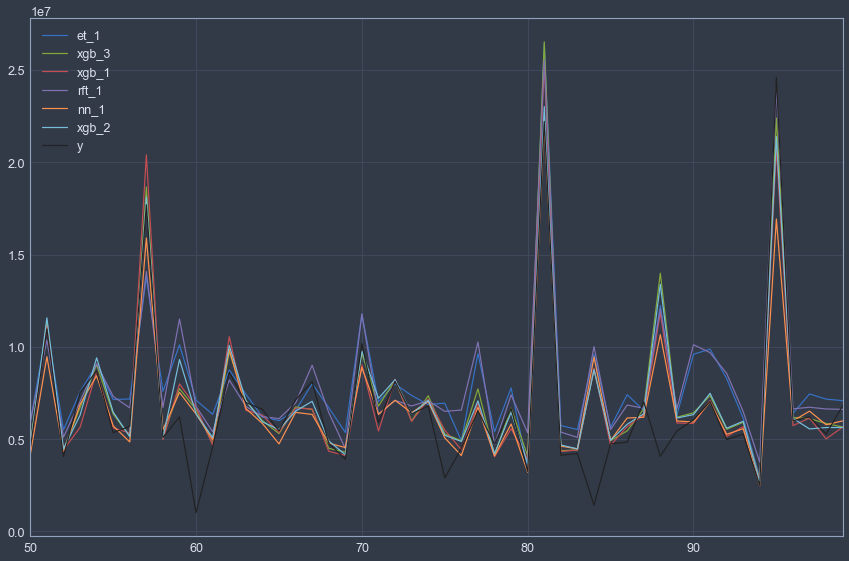

In [285]:
df.iloc[50:100,:].plot(figsize=(12,8))